In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [2]:
import numpy as np
import time
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

In [75]:
def model_RF_test(model_RF, dataX, dataY):
    print("Model performance")
    predict_data = model_RF.predict_proba(dataX)

    # Some stats
    print("Feature Importance : ")
    print(model_RF.feature_importances_) #older version of sklearn
    print("Total number of WNV occurrence in test set : " + str(len(dataY[dataY > 0])))

    print("Number of WNV occurrence the model is able to capture in test set:" + str(
        dataY[np.where(predict_data[:, 1] > 0)].sum()))
    print("check over/under prediciton" + str(predict_data[predict_data[:,1] > 0][:,1].mean() * 110000))
    print("Log loss : " + str(log_loss(dataY, predict_data)))

    print("AUC: " + str(roc_auc_score(dataY, predict_data[:,1])))

    print(
        "This is to test the performance of random forest model, ideally, the logloss is low and also it is able to "
        "capture most of the WNV occurrence")

    return model_RF.feature_importances_ # Check how many wnv it predicts

In [4]:
data = pd.read_sas('/home/guangya/Downloads/wnv_2245new.sas7bdat')

In [19]:
model_RF_best_2 = pickle.load(open('/home/guangya/Downloads/model_best_all', 'rb'))

In [23]:
model_RF_best_2.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)>

In [16]:
x = data.drop(columns=['yrweeks', 'yrwksfid', 'yr_hexid', 'year', 'income1','hexid','PopYesNo'])
x_selected = x[(x.weeks >= 22) & (x.weeks <= 31)].drop(columns = 'wnvbinary').values # 
y_selected = x[(x.weeks >= 22) & (x.weeks <= 31)]['wnvbinary'].values

In [24]:
model = pickle.load(open('/home/guangya/Downloads/RF_model_CV_final_1_22_2020', 'rb'))

In [25]:
trainX_sel, testX_sel, trainY_sel, testY_sel = train_test_split(x_selected, y_selected, test_size = 0.2, random_state  = 1) # CV for smaller models

In [122]:
model_RF_best_2 = RandomForestClassifier(n_estimators=50,
                                         n_jobs=-1,
                                         max_features= 'auto',
                                         max_depth= 50,
                                         min_samples_leaf = 10,
                                         
                                         min_samples_split = ,
                                         bootstrap=True)

In [123]:
model_RF_best_2.fit(trainX_sel,trainY_sel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [124]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel)

Model performance
Feature Importance : 
[0.03575905 0.03604245 0.03473476 0.03995722 0.04420054 0.05832179
 0.02698054 0.04430134 0.03969501 0.02976162 0.03658502 0.04085981
 0.02699635 0.04603861 0.04124129 0.03546493 0.02580173 0.02789147
 0.02664315 0.02985749 0.0486684  0.03683327 0.03287589 0.03517346
 0.03260734 0.03575909 0.01933913 0.03160926]
Total number of WNV occurrence in test set : 27
Number of WNV occurrence the model is able to capture in test set:16.0
check over/under prediciton474.9766500516688
Log loss : 0.004023159506796639
AUC: 0.7788718350102622
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


array([0.03575905, 0.03604245, 0.03473476, 0.03995722, 0.04420054,
       0.05832179, 0.02698054, 0.04430134, 0.03969501, 0.02976162,
       0.03658502, 0.04085981, 0.02699635, 0.04603861, 0.04124129,
       0.03546493, 0.02580173, 0.02789147, 0.02664315, 0.02985749,
       0.0486684 , 0.03683327, 0.03287589, 0.03517346, 0.03260734,
       0.03575909, 0.01933913, 0.03160926])

In [70]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel)

Model performance
Feature Importance : 
[0.03610387 0.03226657 0.03488275 0.03707077 0.0437616  0.05501321
 0.03136347 0.04450575 0.03827677 0.03542132 0.04630067 0.04116431
 0.03422793 0.036588   0.03793027 0.04187429 0.02778214 0.02248517
 0.02720443 0.03383228 0.04764443 0.02775865 0.02701106 0.03973059
 0.03303581 0.03082905 0.02856797 0.02736687]
Total number of WNV occurrence in test set : 27
Number of WNV occurrence the model is able to capture in test set:24.0
check over/under prediciton99.77134389500807
Log loss : 0.0022620249185562385
AUC: 0.905589567936616
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [129]:
x_small[x_small.drop(columns='wnvbinary').columns[column]].drop(columns = 'Input_FID').columns

Index(['tempc', 'preci', 'templag1', 'templag2', 'templag3', 'templag4',
       'precilag1', 'precilag2', 'precilag3', 'precilag4', 'mirmean',
       'mirlag1', 'mirlag2', 'mirlag3', 'mirlag4', 'totpop', 'whitepct',
       'blackpct', 'asianpct', 'Income', 'dlipct', 'dmipct', 'dhipct',
       'Jantemp', 'hpctpreww', 'hpctpostww', 'hpct7089', 'hpctpost90'],
      dtype='object')

In [64]:
x_selected_new = x_small[x_small.drop(columns='wnvbinary').columns[column]].drop(columns = 'Input_FID').values

In [65]:
trainX_sel, testX_sel, trainY_sel, testY_sel = train_test_split(x_selected_new, y_selected, test_size = 0.2, random_state  = 1) # CV for smaller models

In [59]:
column = np.where(fi > 1/44)

In [60]:
fi

array([3.07241599e-02, 3.52793670e-02, 2.94239579e-02, 5.00553478e-03,
       2.82801749e-03, 3.51095252e-02, 3.29032586e-02, 3.83755095e-02,
       5.08218018e-02, 2.94324019e-02, 3.75500606e-02, 3.57218602e-02,
       2.96077186e-02, 4.07439804e-02, 3.56989002e-02, 3.20231265e-02,
       3.27193058e-02, 3.40802896e-02, 3.60028692e-02, 2.69190838e-02,
       2.33178343e-02, 2.38853294e-02, 2.18819014e-02, 3.08823448e-02,
       9.42384096e-04, 1.91792734e-02, 4.45308560e-02, 2.61562798e-02,
       2.46767768e-02, 6.44415056e-04, 1.94232453e-03, 0.00000000e+00,
       1.50658312e-03, 9.04898781e-04, 5.25417520e-04, 9.23886820e-06,
       7.60867399e-04, 1.64773354e-03, 0.00000000e+00, 3.39752008e-02,
       3.16871500e-02, 2.84675276e-02, 2.53574278e-02, 2.61475059e-02])

In [61]:
column

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 23, 26, 27, 28, 39, 40, 41, 42, 43]),)

In [29]:
1 / 44

0.022727272727272728

In [28]:
model.cv_results_

{'mean_fit_time': array([114.94392836, 131.32952112, 113.62031513, 131.19400501]),
 'std_fit_time': array([1.89700826, 2.22720775, 1.50943815, 2.57439597]),
 'mean_score_time': array([1.0615688 , 1.20796931, 1.05303723, 1.20782661]),
 'std_score_time': array([0.00792043, 0.05019958, 0.00446121, 0.05200646]),
 'param_bootstrap': masked_array(data=[True, True, True, True],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[60, 60, 80, 80],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[8, 8, 8, 8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': mask

In [13]:
x_selected.shape

(602040, 44)

In [14]:
y_selected.shape

(602040,)

In [5]:
x = data.drop(columns=['wnvbinary', 'yrweeks', 'yrwksfid', 'yr_hexid', 'year', 'income1','PopYesNo']) 

In [6]:
x_test = data[data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns[:]]
x_selected = x[x.drop(columns=x_test.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]]).columns[[2,4,5,6,7,12,13,14,15,16,17]]].values
y_selected = data['wnvbinary'].values

In [ ]:
x_test = data[data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns[:]]
x_selected = x[x.drop(columns=x_test.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]]).columns[[2,4,5,6,7,12,13,14,15,16,17]]].values
y_selected = data['wnvbinary'].values

In [9]:
model_RF = pickle.load(open('/home/guangya/Downloads/RF_model_CV_final_12-11', 'rb'))

In [13]:
model_RF.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 12,
 'min_samples_split': 6,
 'n_estimators': 1200}

In [11]:
pred = model_RF.predict_proba(testX_sel)

In [ ]:
pred

In [15]:
model_RF_test(model_RF,testX_sel,testY_sel)

Model performance
Feature Importance : 
[0.0913835  0.09518686 0.09497561 0.09248659 0.09505908 0.08464859
 0.09037246 0.09035588 0.0839211  0.08300739 0.09860295]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:164.0
check over/under prediciton149.85695562396802
Log loss : 0.003966331368548016
AUC: 0.9193705360219215
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [45]:
model_RF

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=60,
                                              max_features=5,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=8,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=2000, n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                        

In [46]:
model_RF.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [ ]:
model_RF_best_2 = RandomForestClassifier(n_estimators=1200,
                                         n_jobs=-1,
                                         max_features='sqrt',
                                         max_depth= 80,
                                         min_samples_leaf = 8,
                                         min_samples_split = 4,
                                         bootstrap=True)

In [23]:
pred = model_RF_best_1.predict_proba(trainX_sel_all)

NameError: name 'model_RF_best_1' is not defined

In [ ]:
model_RF_best_2.fit(trainX_sel,trainY_sel)

In [ ]:
model_RF_best_1 = RandomForestClassifier(n_estimators=1200,
                                         n_jobs=-1,
                                         max_features='sqrt',
                                         max_depth=80,
                                         min_samples_leaf = 8,
                                         min_samples_split = 4,
                                         bootstrap=True)

In [ ]:
model_RF_best_1.fit(trainX_sel_all,trainY_sel_all)

In [ ]:
model_RF_test(model_RF_best_1,testX_sel_all,testY_sel_all)

In [13]:
x_selected = x[x.drop(columns=x.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]]).columns[[2,4,5,6,7,12,13,14,15,16,17]]].values
trainX_sel_2, testX_sel_2, trainY_sel_2, testY_sel_2 = train_test_split(x_selected, y_selected, test_size = 0.2, random_state  = 1) # CV for smaller models

In [24]:
pred = model_RF.predict_proba(trainX_sel_all)

In [16]:
pred[:,1].mean()

0.0006599348111532347

In [17]:
testY_sel.mean()

0.0005675133227212956

In [ ]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel)

In [213]:
model_RF_best_3 = RandomForestClassifier(n_estimators=1200,
                                         n_jobs=-1,
                                         max_features='sqrt',
                                         max_depth=80,
                                         min_samples_leaf = 8,
                                         min_samples_split = 4,
                                         bootstrap=True)

In [ ]:
model_RF_best_3.fit(trainX_sel_2,trainY_sel_2)

In [68]:
model_RF_test(model_RF_best_3,testX_sel_2,testY_sel_2)

Model performance
Feature Importance : 
[0.09162027 0.09602338 0.09459108 0.09212363 0.09547033 0.0850854
 0.09254329 0.08942846 0.08357565 0.0839603  0.0955782 ]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:161.0
check over/under prediciton172.76941043935642
Log loss : 0.004250340494764816
AUC: 0.9113654499075113
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [73]:
pred_2 = model_RF_best_3.predict_proba(testX_sel_2)

In [80]:
testY_sel

array([0., 0., 0., ..., 0., 0., 0.])

In [91]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = metrics.roc_curve(testY_sel_2, pred_2[:,1], pos_label=1)

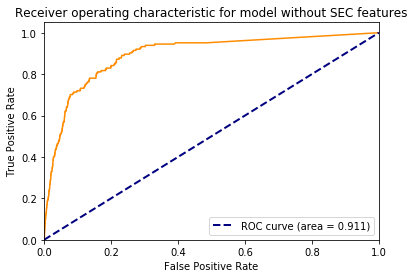

<Figure size 432x288 with 0 Axes>

In [133]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',label='ROC curve (area = %0.3f)' % roc_auc_score(testY_sel_2, pred_2[:,1]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for model without SEC features')
plt.legend(loc="lower right")
plt.show()
plt.savefig('test.png')

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(testY_sel, pred[:,1], pos_label=1)

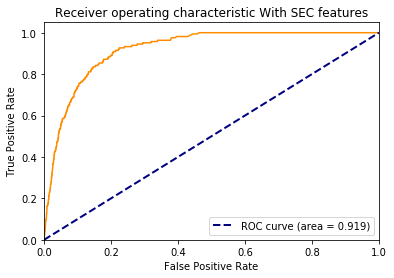

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',label='ROC curve (area = %0.3f)' % roc_auc_score(testY_sel, pred[:,1]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic With SEC features')
plt.legend(loc="lower right")
plt.show()
plt.savefig('test1.png')

In [26]:
testY_sel

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
temp = np.concatenate((testY_sel.reshape(len(testY_sel),1),pred),1)

In [40]:
temp[temp[:,0] == 1][:10]

array([[1.00000000e+00, 9.97751429e-01, 2.24857119e-03],
       [1.00000000e+00, 9.93524493e-01, 6.47550690e-03],
       [1.00000000e+00, 9.94249453e-01, 5.75054705e-03],
       [1.00000000e+00, 9.94905015e-01, 5.09498450e-03],
       [1.00000000e+00, 9.98678444e-01, 1.32155620e-03],
       [1.00000000e+00, 9.94338433e-01, 5.66156700e-03],
       [1.00000000e+00, 9.90367942e-01, 9.63205760e-03],
       [1.00000000e+00, 9.76862899e-01, 2.31371013e-02],
       [1.00000000e+00, 9.93558419e-01, 6.44158133e-03],
       [1.00000000e+00, 9.99242273e-01, 7.57726782e-04]])

In [42]:
temp[temp[:,0] == 1][:10][:,2].mean()

0.006652119988161337

In [43]:
temp[temp[:,0] == 0][:10][:,2].mean()

0.00023697007182631584

In [203]:
x[x.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]]].columns

Index(['yr', 'weeks', 'owpct', 'dospct', 'dhipct', 'blpct', 'dfpct', 'efpct',
       'mfpct', 'shrubpct', 'glandpct', 'pasturepct', 'ccpct', 'wwpct',
       'Jantemp'],
      dtype='object')

In [136]:
x[x.drop(columns=x.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]]).columns[[2,4,5,6,7,12,13,14,15,16,17]]].columns

Index(['tempc', 'templag1', 'templag2', 'templag3', 'templag4', 'mirmean',
       'mirlag1', 'mirlag2', 'mirlag3', 'mirlag4', 'totpop'],
      dtype='object')

In [137]:
model_RF_all = pickle.load(open('/home/guangya/Downloads/RF_model_max', 'rb'))

In [140]:
trainX, testX, trainY, testY = train_test_split(x_test, y_selected, test_size = 0.2, random_state  = 1)

In [141]:
model_RF_test(model_RF_all,testX,testY)

Model performance
Feature Importance : 
[0.02629452 0.02578387 0.03451336 0.03106555 0.00981822 0.00860826
 0.0366341  0.03587256 0.03631539 0.03675893 0.03064472 0.03111556
 0.03201555 0.0316537  0.03407201 0.03598392 0.03585484 0.03363267
 0.03374397 0.02898736 0.02450161 0.02367823 0.02390076 0.02182437
 0.02463483 0.00266412 0.02063995 0.02651296 0.02588299 0.0213744
 0.00038678 0.0033449  0.00060412 0.00165944 0.00048802 0.0017847
 0.00112839 0.00137582 0.00300273 0.00033028 0.03377126 0.
 0.02563835 0.02543598 0.0267511  0.02421458 0.02510029]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:153.0
check over/under prediciton175.3351488248008
Log loss : 0.004998724097310009
AUC: 0.8833544836040433
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [211]:
x_test.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]]

Index(['yr', 'weeks', 'owpct', 'dospct', 'blpct', 'dfpct', 'efpct', 'mfpct',
       'shrubpct', 'glandpct', 'pasturepct', 'ccpct', 'wwpct', 'ehwpct',
       'PopYesNo'],
      dtype='object')